In [2]:
import pandas as pd
!pip install --upgrade pip
!pip install --upgrade openai
!pip install openai==0.28.1
import openai
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Datasets/Cyberattacks Detection.csv')

data.head()

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Attempting uninstall: openai
    Found existing installation: openai 1.40.2
    Uninstalling openai-1.40.2:
      Successfully uninstalled openai-1.40.2
Mounted at /content/drive


<ipython-input-2-bff8d63eadd8>:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Datasets/Cyberattacks Detection.csv')


,Attack ID,Source IP,Destination IP,Source Country,Destination Country,Protocol,Source Port,Destination Port,Attack Type,Payload Size (bytes),Detection Label,Confidence Score,ML Model,Affected System,Port Type,Timestamp
0,1.0,68.156.227.194,194.91.121.112,India,USA,ICMP,16824.0,53410.0,Brute Force,3936.0,Detected,0.600507,K-Nearest Neighbors,Cloud Storage,Other,NaN
1,2.0,249.221.229.41,3.207.120.235,Germany,USA,TCP,23977.0,31745.0,Advanced Persistent Threat (APT),2870.0,Detected,0.524150,K-Nearest Neighbors,Network Router,Other,NaN
2,4.0,154.55.209.171,132.115.33.82,USA,China,UDP,36556.0,38880.0,Cross-Site Scripting (XSS) Attack,3833.0,Not Detected,0.238944,Neural Network,Workstation,Other,NaN
3,5.0,106.61.204.27,40.61.49.130,France,France,UDP,14724.0,21669.0,Insider Threat,4301.0,Not Detected,0.122334,Neural Network,Workstation,Other,NaN
4,6.0,144.190.250.125,34.68.66.192,South Korea,Germany,TCP,44693.0,6474.0,Watering Hole Attack,4569.0,Detected,0.970895,Neural Network,Application Server,Other,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Attack ID             99940 non-null  float64
 1   Source IP             99950 non-null  object 
 2   Destination IP        99945 non-null  object 
 3   Source Country        99950 non-null  object 
 4   Destination Country   99947 non-null  object 
 5   Protocol              99941 non-null  object 
 6   Source Port           99949 non-null  float64
 7   Destination Port      99946 non-null  float64
 8   Attack Type           99941 non-null  object 
 9   Payload Size (bytes)  99947 non-null  float64
 10  Detection Label       99933 non-null  object 
 11  Confidence Score      99946 non-null  float64
 12  ML Model              99939 non-null  object 
 13  Affected System       99954 non-null  object 
 14  Port Type             99939 non-null  object 
 15  Timestamp         

In [4]:
data.isnull().sum()

,0
Attack ID,60
Source IP,50
Destination IP,55
Source Country,50
Destination Country,53
Protocol,59
Source Port,51
Destination Port,54
Attack Type,59
Payload Size (bytes),53


In [5]:
data.duplicated().sum()

0

In [6]:
print("\nCommon Attack Types:")
print(data['Attack Type'].value_counts())


Common Attack Types:
Attack Type
DNS Tunneling                                       5121
Cross-Site Scripting (XSS) Attack                   5094
Malware                                             5071
Ping of Death                                       5039
Email Spam                                          5029
Insider Threat                                      5028
Advanced Persistent Threat (APT)                    5023
Drive-by Download                                   5019
Cryptojacking                                       5016
Man-in-the-Middle (MITM)                            5004
Distributed Denial of Service (DDoS)                5002
Credential Stuffing                                 4985
Simple Network Management Protocol (SNMP) Attack    4981
Zero-Day Exploit                                    4976
Phishing                                            4975
Brute Force                                         4960
Watering Hole Attack                                49

In [7]:
print("\nDetection Label Counts:")
print(data['Detection Label'].value_counts())


Detection Label Counts:
Detection Label
Detected        50119
Not Detected    49814
Name: count, dtype: int64


In [8]:
print("\nTop Source Countries:")
print(data['Source Country'].value_counts().head())


Top Source Countries:
Source Country
India          10163
South Korea    10109
Japan          10022
France         10000
UK              9978
Name: count, dtype: int64


In [9]:
print("\nTop Destination Countries:")
print(data['Destination Country'].value_counts().head())


Top Destination Countries:
Destination Country
Japan     10124
Brazil    10116
France    10104
Russia    10076
USA       10004
Name: count, dtype: int64


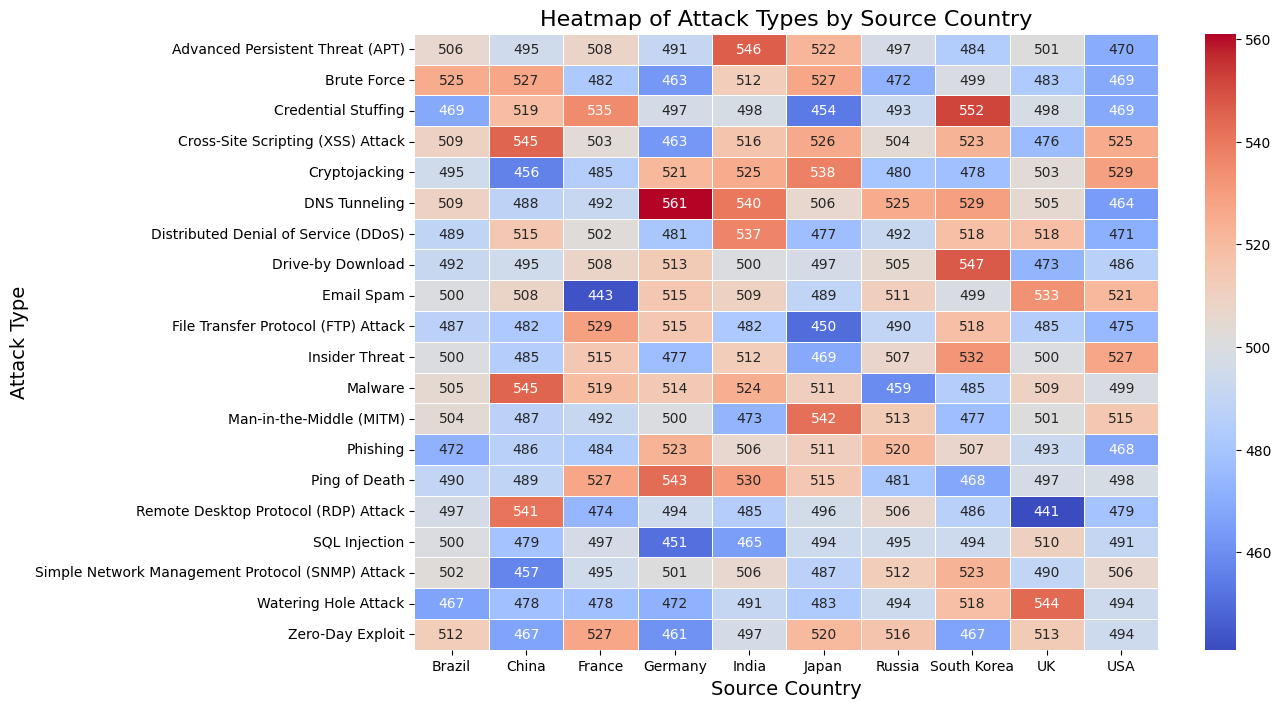

In [10]:
# Heatmap to show correlation between Attack Type and Source Country
pivot_table = data.pivot_table(index='Attack Type', columns='Source Country', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Heatmap of Attack Types by Source Country', fontsize=16)
plt.xlabel('Source Country', fontsize=14)
plt.ylabel('Attack Type', fontsize=14)
plt.show()

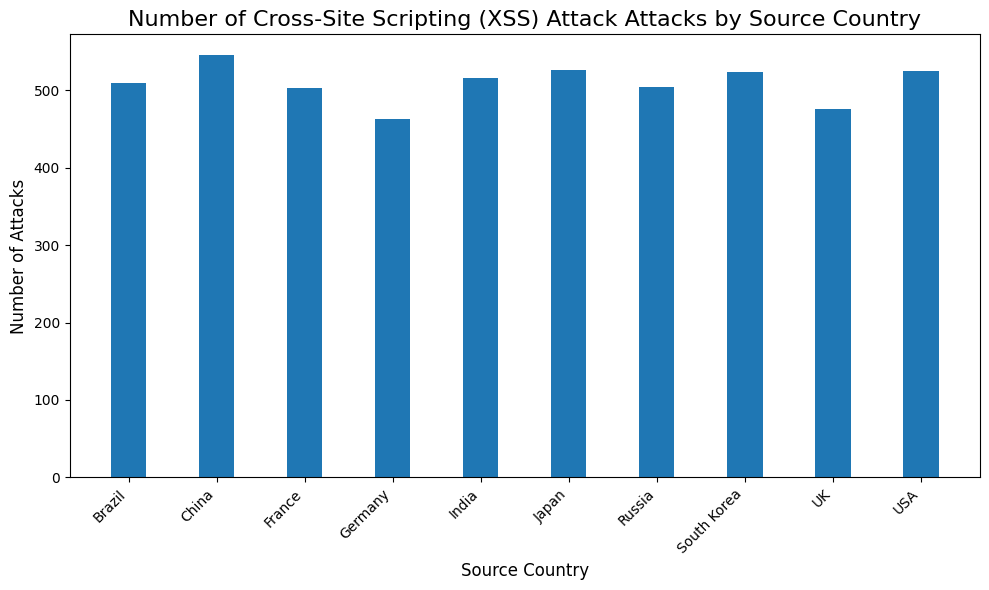

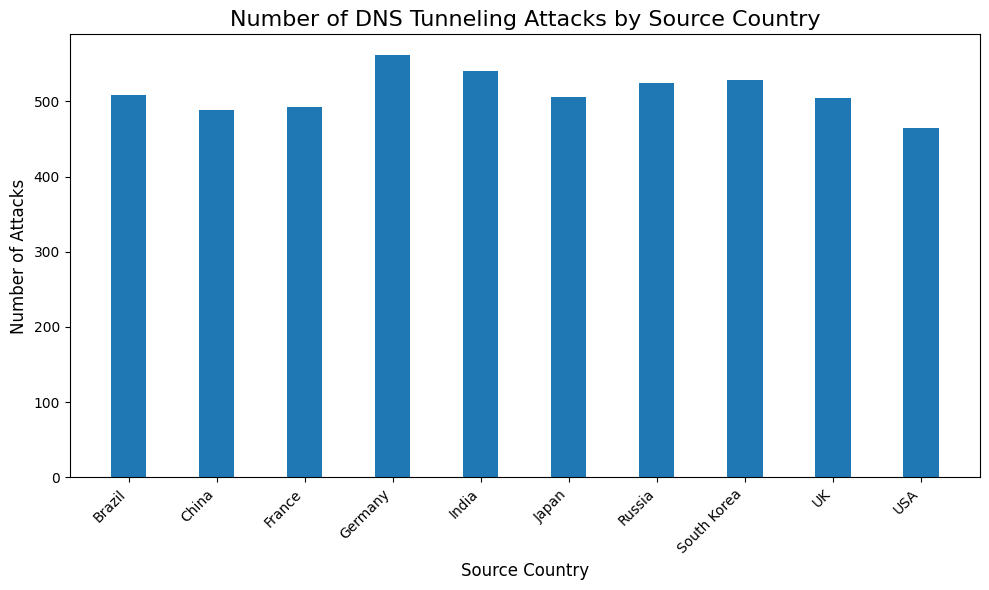

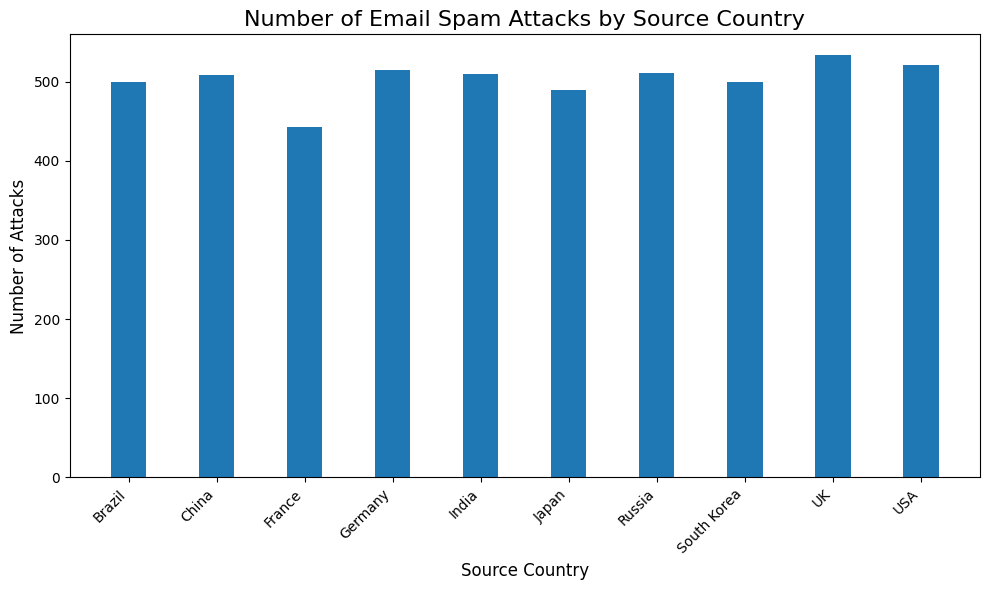

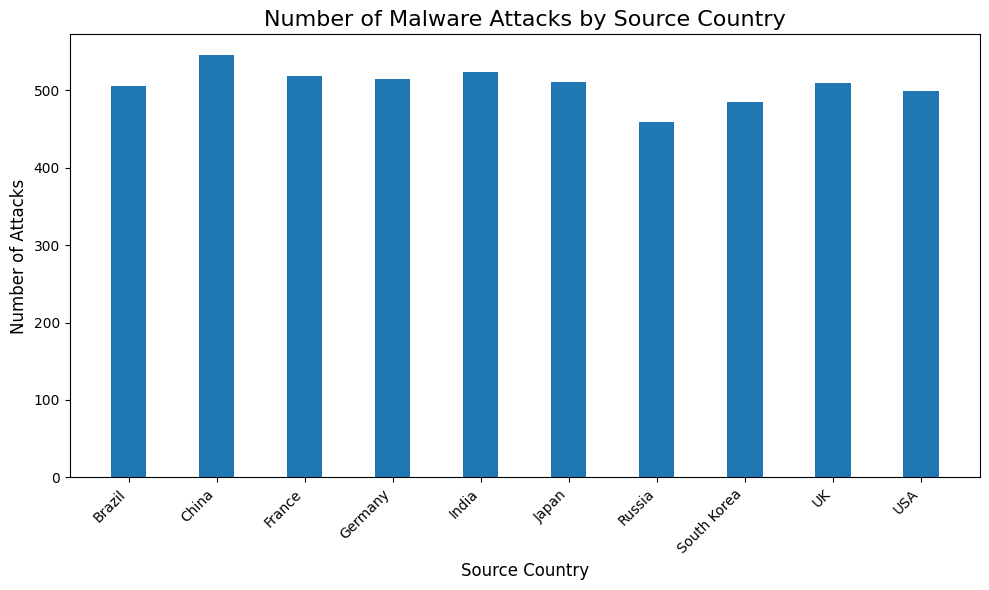

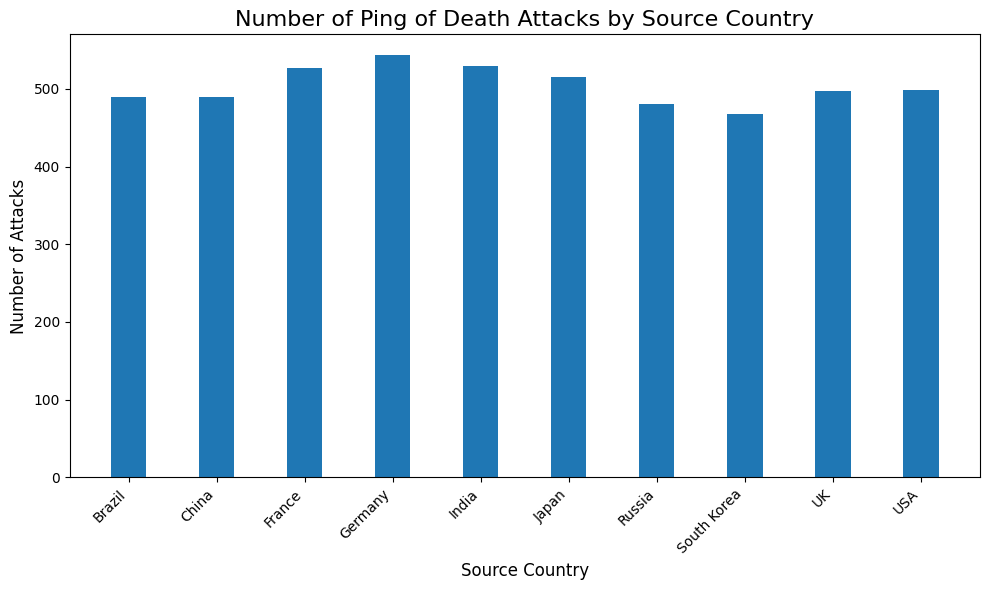

In [30]:

import matplotlib.pyplot as plt

# Simplify data by focusing on the top N attack types and source countries
top_n_attack_types = data['Attack Type'].value_counts().head(5).index
top_n_source_countries = data['Source Country'].value_counts().head(10).index

# Filter the data to include only the top N attack types and source countries
filtered_data = data[data['Attack Type'].isin(top_n_attack_types) & data['Source Country'].isin(top_n_source_countries)]

# Pivot the data to get counts for each Attack Type and Source Country
pivot_table = filtered_data.pivot_table(index='Attack Type', columns='Source Country', aggfunc='size', fill_value=0)

# Plot a separate line chart for each attack type
for attack_type in pivot_table.index:
    plt.figure(figsize=(10, 6))
    plt.bar(pivot_table.columns, pivot_table.loc[attack_type] , width= 0.4)

    # Improve plot aesthetics
    plt.title(f'Number of {attack_type} Attacks by Source Country', fontsize=16)
    plt.xlabel('Source Country', fontsize=12)
    plt.ylabel('Number of Attacks', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


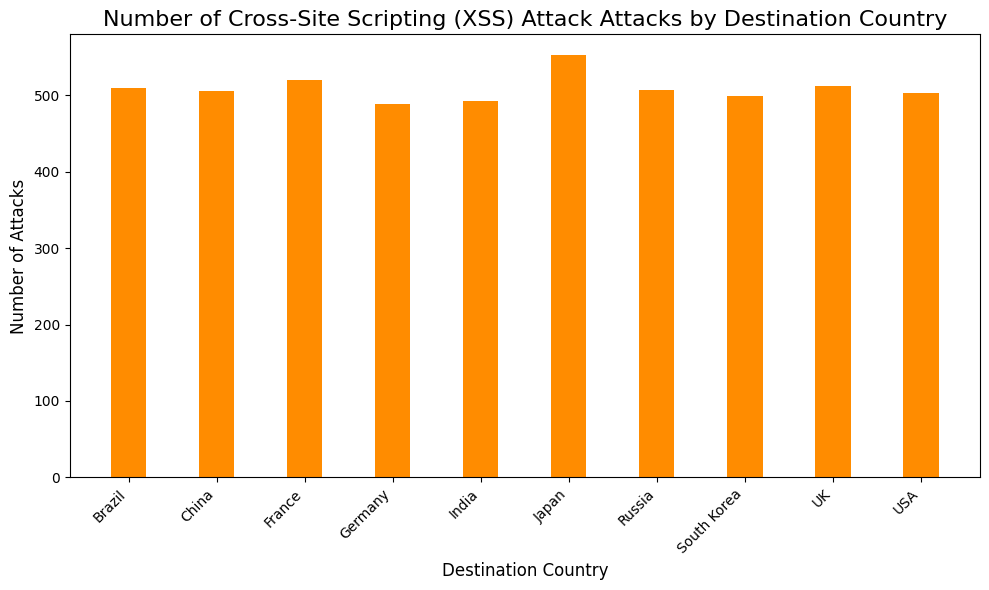

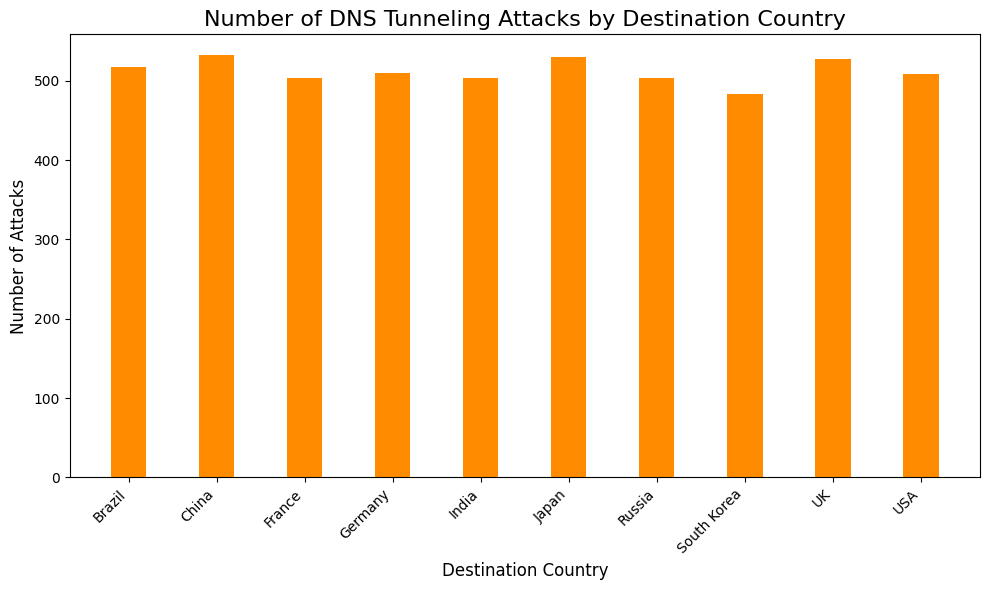

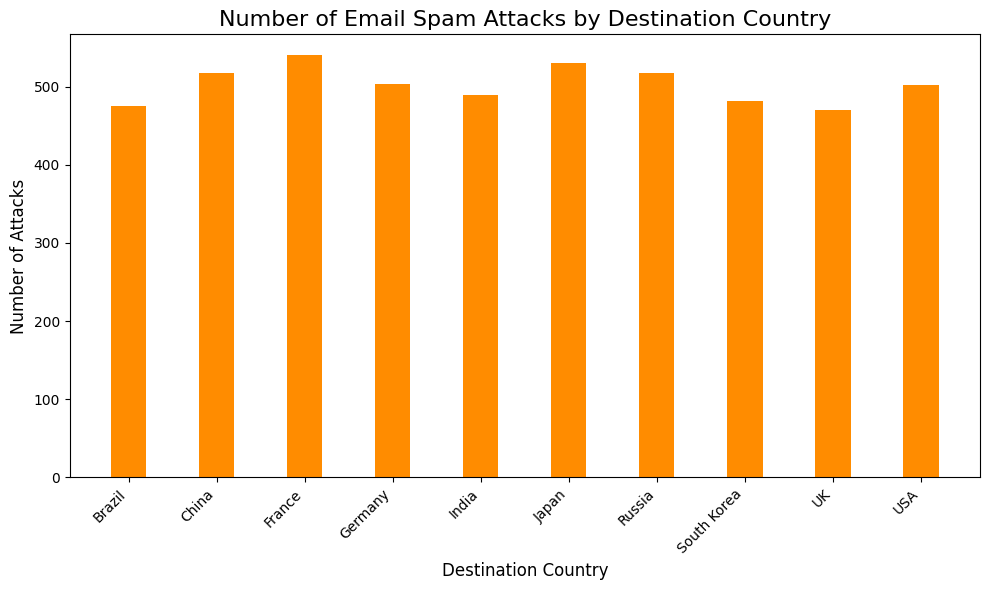

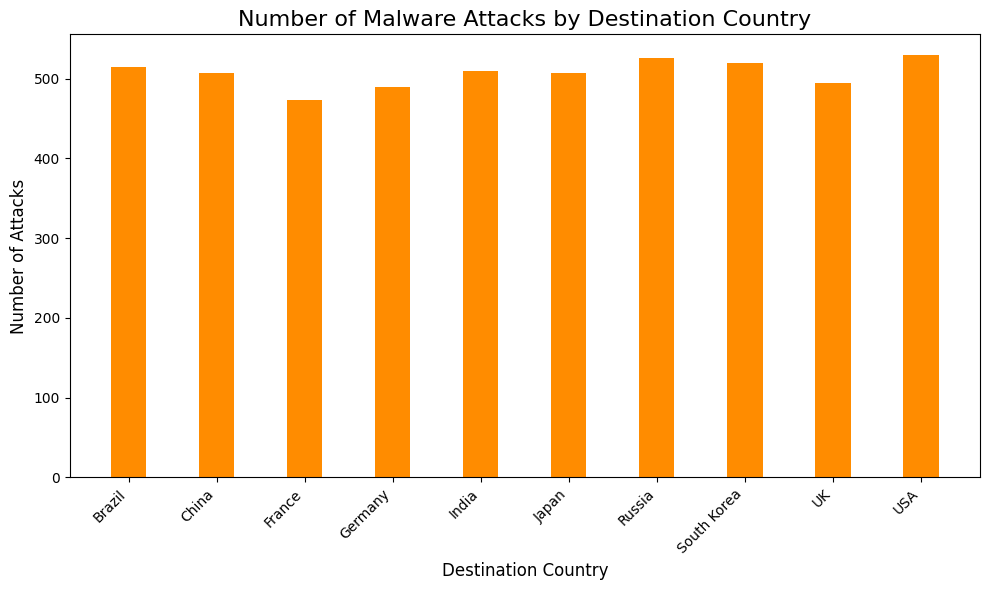

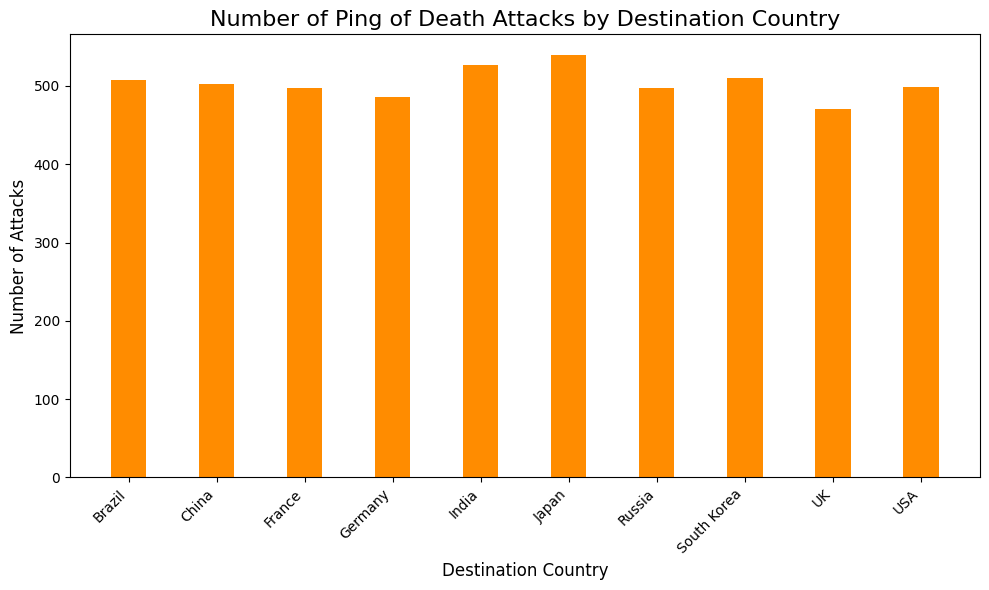

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Simplify data by focusing on the top N attack types and destination countries
top_n_attack_types = data['Attack Type'].value_counts().head(5).index
top_n_destination_countries = data['Destination Country'].value_counts().head(10).index

# Filter the data to include only the top N attack types and destination countries
filtered_data = data[data['Attack Type'].isin(top_n_attack_types) & data['Destination Country'].isin(top_n_destination_countries)]

# Pivot the data to get counts for each Attack Type and Destination Country
pivot_table = filtered_data.pivot_table(index='Attack Type', columns='Destination Country', aggfunc='size', fill_value=0)

# Plot a separate line chart for each attack type
for attack_type in pivot_table.index:
    plt.figure(figsize=(10, 6))
    plt.bar(pivot_table.columns, pivot_table.loc[attack_type], color='darkorange' , width = 0.4)

    # Improve plot aesthetics
    plt.title(f'Number of {attack_type} Attacks by Destination Country', fontsize=16)
    plt.xlabel('Destination Country', fontsize=12)
    plt.ylabel('Number of Attacks', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


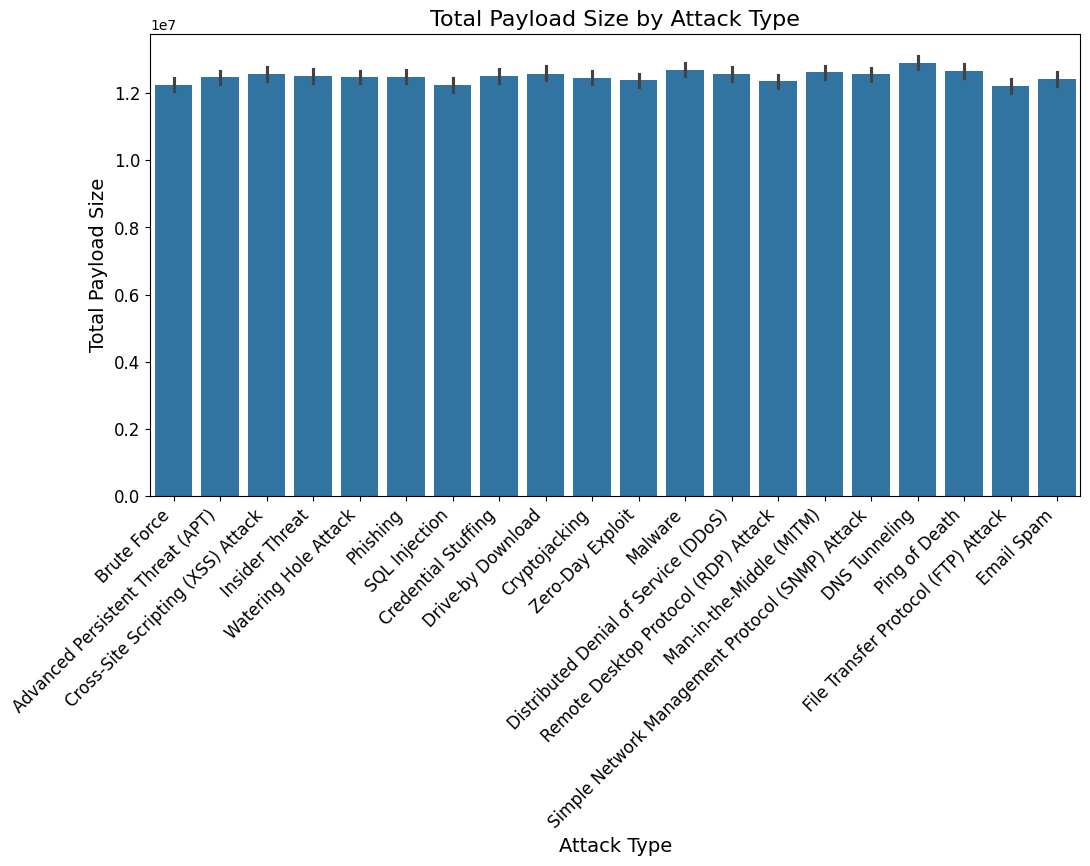

In [38]:

# Create a bar chart for Payload Size vs Attack Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Attack Type', y='Payload Size (bytes)', data=data, estimator=sum)

# Improve plot aesthetics
plt.title('Total Payload Size by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Total Payload Size', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


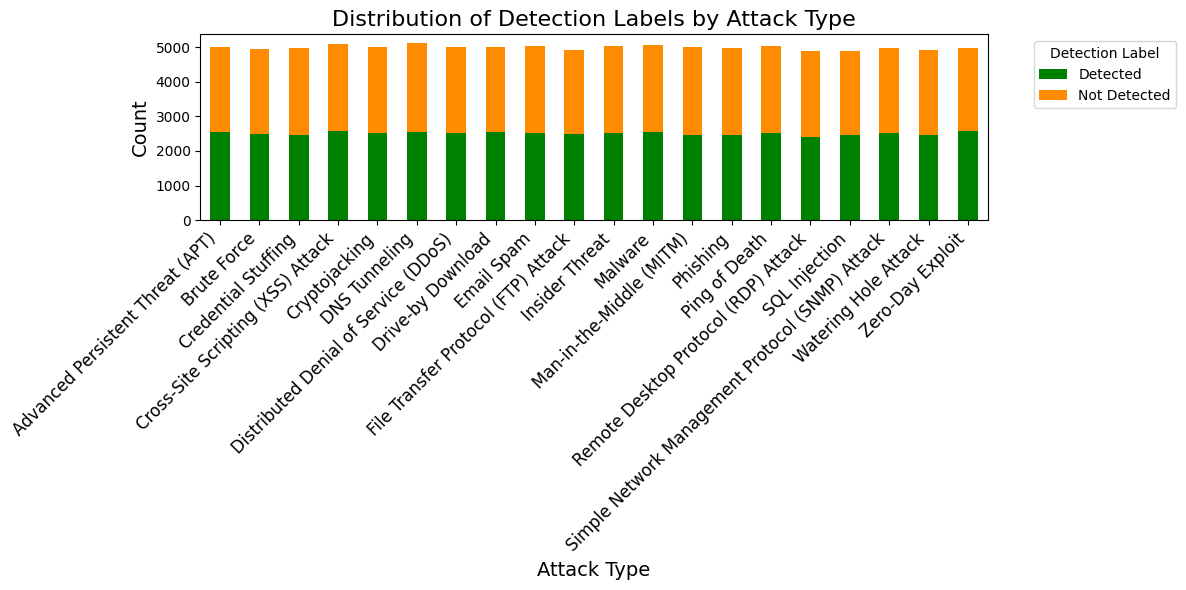

In [54]:
pivot_table = data.pivot_table(index='Attack Type', columns='Detection Label', aggfunc='size', fill_value=0)
colors = {'Detected': 'green', 'Not Detected': 'darkorange'}
# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[label] for label in pivot_table.columns])

# Improve plot aesthetics

plt.legend(title='Detection Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution of Detection Labels by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Detection Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
print("\nProtocol Usage:")
print(data['Protocol'].value_counts())


Protocol Usage:
Protocol
TCP     33691
UDP     33202
ICMP    33048
Name: count, dtype: int64


In [15]:
print("\nAverage Payload Size:")
print(data.groupby('Detection Label')['Payload Size (bytes)'].mean())


Average Payload Size:
Detection Label
Detected        2503.744546
Not Detected    2499.637412
Name: Payload Size (bytes), dtype: float64


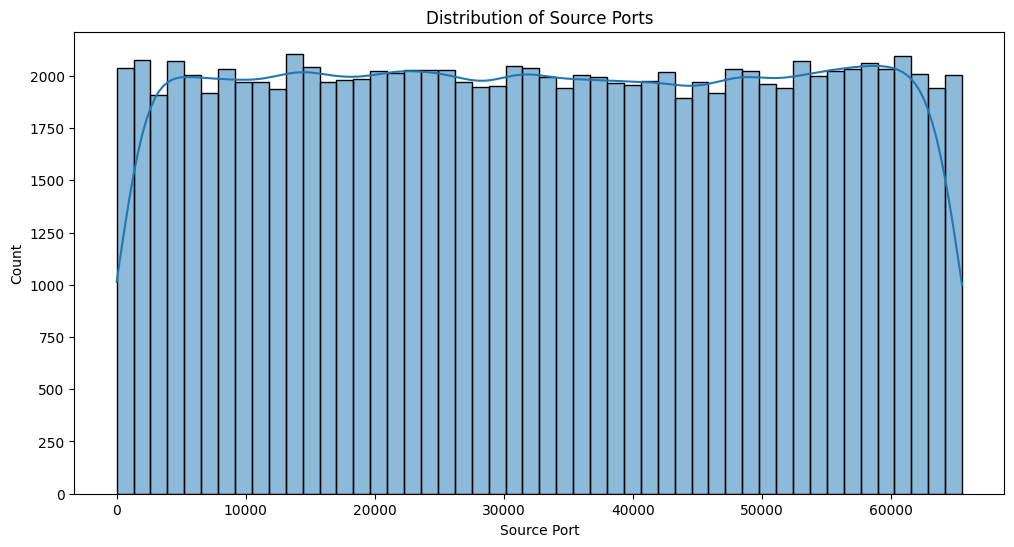

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Source Port'], bins=50, kde=True)
plt.title('Distribution of Source Ports')
plt.show()

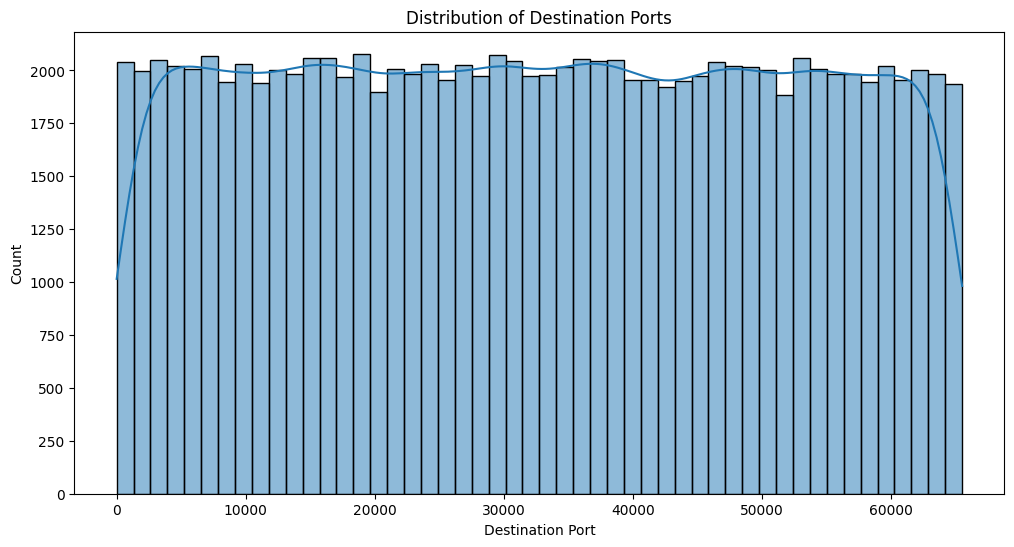

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Destination Port'], bins=50, kde=True)
plt.title('Distribution of Destination Ports')
plt.show()

In [18]:
print("\nCorrelation between Confidence Score and Detection Label:")
correlation = data['Confidence Score'].corr(data['Detection Label'].apply(lambda x: 1 if x == 'Detected' else 0))
print(correlation)


Correlation between Confidence Score and Detection Label:
0.8700009279449153



Effectiveness of ML Models by Attack Type:
Detection Label                                                          Detected  \
ML Model               Attack Type                                                  
K-Nearest Neighbors    Advanced Persistent Threat (APT)                  0.508197   
                       Brute Force                                       0.504306   
                       Credential Stuffing                               0.496432   
                       Cross-Site Scripting (XSS) Attack                 0.519174   
                       Cryptojacking                                     0.517490   
...                                                                           ...   
Support Vector Machine Remote Desktop Protocol (RDP) Attack              0.475789   
                       SQL Injection                                     0.491968   
                       Simple Network Management Protocol (SNMP) Attack  0.518768   
                     

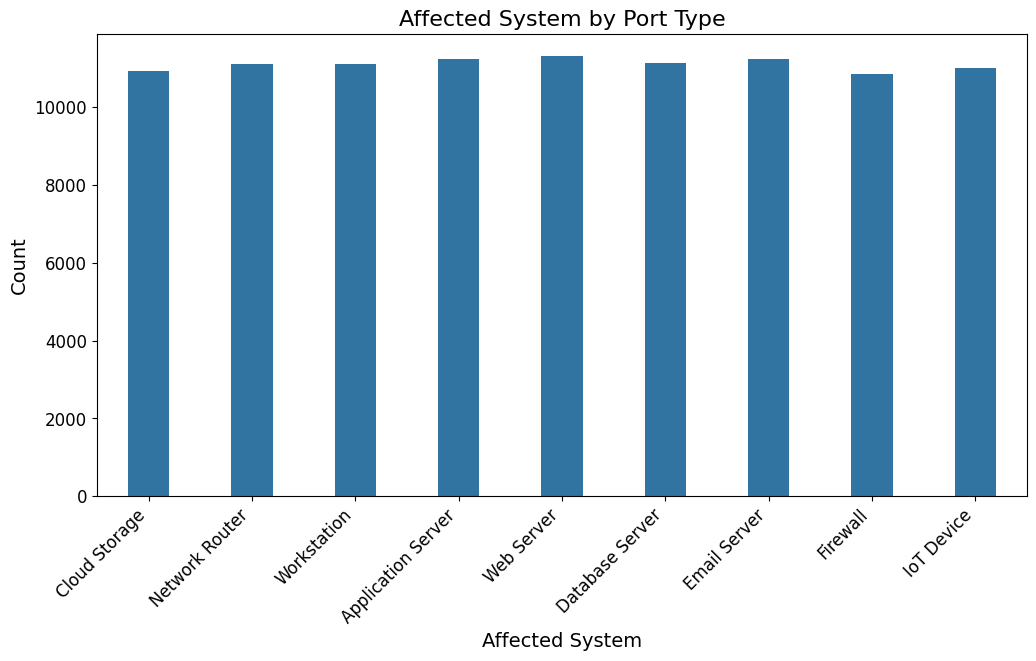

In [28]:
model_effectiveness = data.groupby(['ML Model', 'Attack Type'])['Detection Label'].value_counts(normalize=True).unstack()
print("\nEffectiveness of ML Models by Attack Type:")
print(model_effectiveness)

# Patterns in affected system and port type for specific attack types
plt.figure(figsize=(12, 6))
sns.countplot(x='Affected System', data=data , width=0.4)

# Adding a title to the plot
plt.title('Affected System by Port Type', fontsize=16)

# Improving label aesthetics
plt.xlabel('Affected System', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [20]:
openai.api_key = ""
def ask_llm(question, context_data):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # Specify the model you want to use
        messages=[
            {"role": "system", "content": "You are an expert data scientist analyzing cyberattack detection data."},
            {"role": "user", "content": f"Question: {question}\nContext: {context_data}"}
        ]
    )
    return response['choices'][0]['message']['content']

context_info = data.head().to_string()  # Pass relevant context like the first few rows of data
question = input("Please type your question: ")  # Get question from user input
llm_response = ask_llm(question, context_info)
print(llm_response)

Please type your question: what is the most commmon attack


AuthenticationError: You didn't provide an API key. You need to provide your API key in an Authorization header using Bearer auth (i.e. Authorization: Bearer YOUR_KEY), or as the password field (with blank username) if you're accessing the API from your browser and are prompted for a username and password. You can obtain an API key from https://platform.openai.com/account/api-keys.

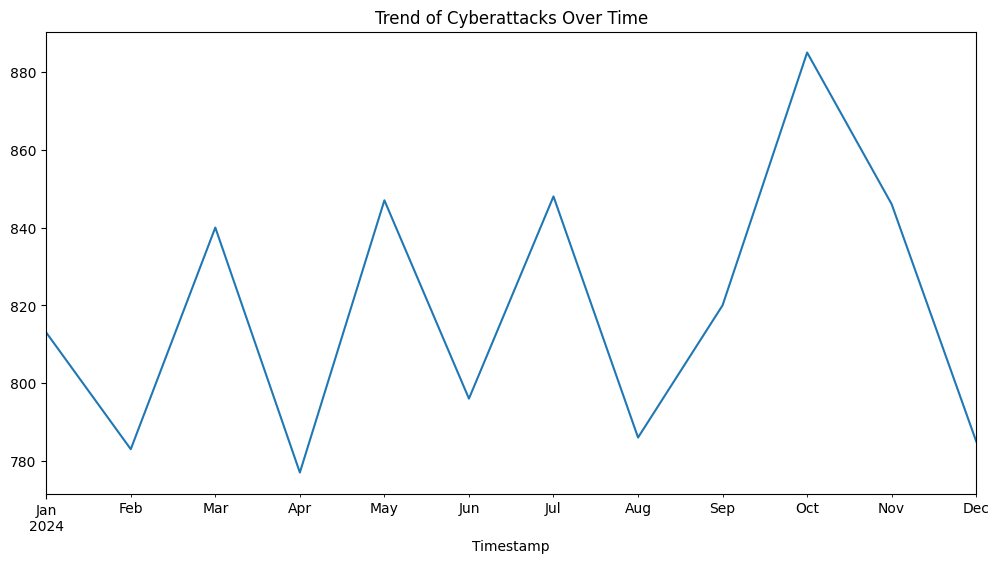

"# Specific time periods with frequent attacks\nif 'Timestamp' in data.columns:\n    data['Hour'] = data['Timestamp'].dt.hour\n    plt.figure(figsize=(12, 6))\n    sns.countplot(x='Hour', data=data)\n    plt.title('Frequency of Cyberattacks by Hour')\n    plt.show()"

In [55]:
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
    plt.figure(figsize=(12, 6))
    data.set_index('Timestamp').resample('M').size().plot()
    plt.title('Trend of Cyberattacks Over Time')
    plt.show()
